<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/Simons_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit
%pip install pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.6 MB/s eta 0:00:00
  Created wheel fo

# Simon's Algorithm

In this section, we first introduce the Simon problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run on a simulator and device.

## Introduction

Simon's algorithm, first introduced in [Daniel R. Simon (1997) "On the Power of Quantum Computation" SIAM Journal on Computing, 26(5), 1474–1483](https://doi.org/10.1137/S0097539796298637) ,was the first quantum algorithm to show an exponential speed-up versus the best classical algorithm in solving a specific problem. This inspired the quantum algorithms based on the quantum Fourier transform, which is used in the most famous quantum algorithm: Shor's factoring algorithm.

## Simon's Problem

We are given an unknown blackbox function $f$, which is guaranteed to be either one-to-one ($1:1$) or two-to-one ($2:1$), where one-to-one and two-to-one functions have the following properties:



- one-to-one: maps exactly one unique output for every input. An example with a function that takes 4 inputs is:

Screenshot 2023-07-26 at 16-45-01 Simon&#39 s Algorithm.png







- two-to-one: maps exactly two inputs to every unique output. An example with a function that takes 4 inputs is:



Screenshot 2023-07-26 at 16-45-20 Simon&#39 s Algorithm.png

This two-to-one mapping is according to a hidden bitstring,$b$ , where:


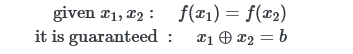

Given this blackbox $f$, how quickly can we determine if $f$ is one-to-one or two-to-one? Then, if $f$ turns out to be two-to-one, how quickly can we determine $b$? As it turns out, both cases boil down to the same problem of finding $b$, where a bitstring of $b= 0000....$ represents the one-to-one $f$.

## Simon's Algorithm

### Classical Solution

Classically, if we want to know what $b$ is with 100% certainty for a given $f$, we have to check up to $2^{n-1}+1$ inputs, where n is the number of bits in the input. This means checking just over half of all the possible inputs until we find two cases of the same output. Much like the Deutsch-Jozsa problem, if we get lucky, we could solve the problem with our first two tries. But if we happen to get an $f$ that is one-to-one, or get really unlucky with an $f$ that’s two-to-one, then we’re stuck with the full $2^{n-1}+1$. There are known algorithms that have a lower bound of $\Omega(2^{n/2})$, but generally speaking the complexity grows exponentially with n.

### Quantum Solution

The quantum circuit that implements Simon's algorithm is shown below.

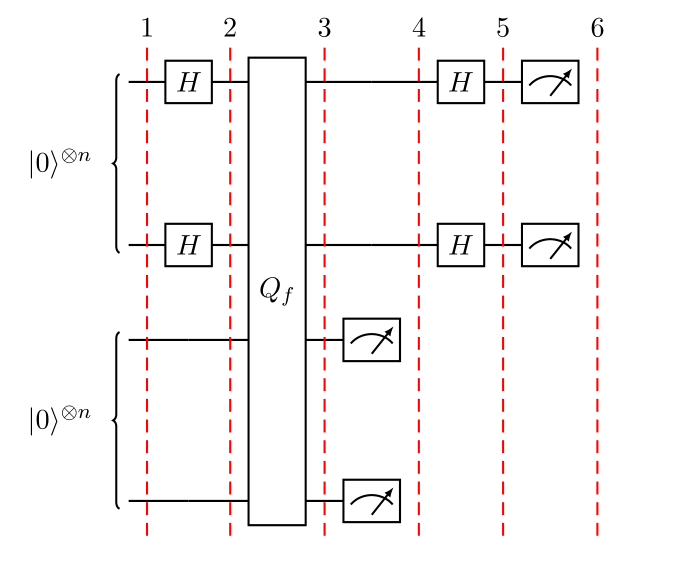

Where the query function, $Q_f$
acts on two quantum registers as:


Screenshot 2023-07-26 at 16-49-22 Simon&#39 s Algorithm.png


In the specific case that the second register is in the state $|0⟩$ we have:


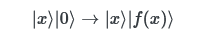

The algorithm involves the following steps.


- Two $n$-qubit input registers are initialized to the zero state:


Screenshot 2023-07-26 at 16-51-23 Simon&#39 s Algorithm.png

- Apply a Hadamard transform to the first register:

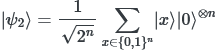

- Apply the query function $Q_f$

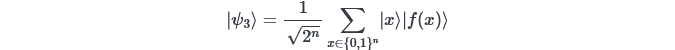

- Measure the second register. A certain value of $f(x)$ will be observed. Because of the setting of the problem, the observed value $f(x)$ could correspond to two possible inputs: $x$ and $y$ = $ x\oplus b$. Therefore the first register becomes:


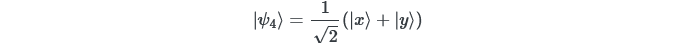


where we omitted the second register since it has been measured.

- Apply Hadamard on the first register:

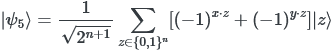

- Measuring the first register will give an output only if:

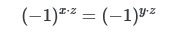

which means:


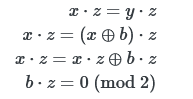

A string $z$ will be measured, whose inner product with $b=0$. Thus, repeating the algorithm $\approx n$ times, we will be able to obtain $n$ different values of $z$ and the following system of equation can be written:

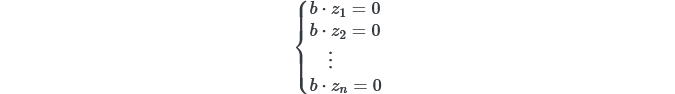


From which can be determined, for example by Gaussian elimination.


So, in this particular problem the quantum algorithm performs exponentially fewer steps than the classical one. Once again, it might be difficult to envision an application of this algorithm (although it inspired the most famous algorithm created by Shor) but it represents the first proof that there can be an exponential speed-up in solving a specific problem by using a quantum computer rather than a classical one.

## Example

Let's see the example of Simon's algorithm for 2 qubits with the secret string $b=11$, so that $f(x) = f(y)$  if $y = x \oplus b$. The quantum circuit to solve the problem is

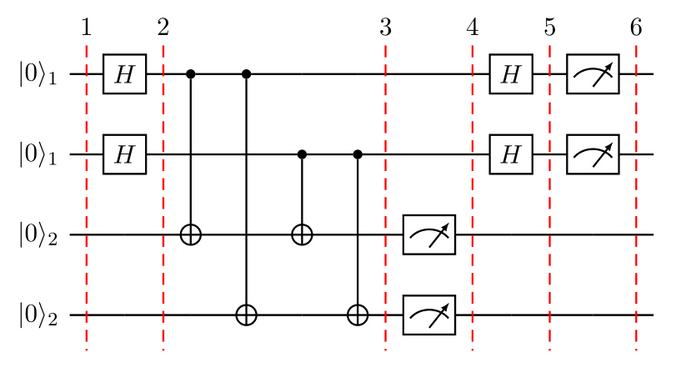

- Two 2-qubit input registers are initialized to the zero state:

Screenshot 2023-07-26 at 16-56-35 Simon&#39 s Algorithm.png

 - Apply Hadamard gates to the qubits in the first register:


 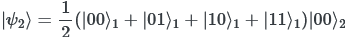

- For the string $b=11$, the query function can be implemented as

Screenshot 2023-07-26 at 16-59-23 Simon&#39 s Algorithm.png

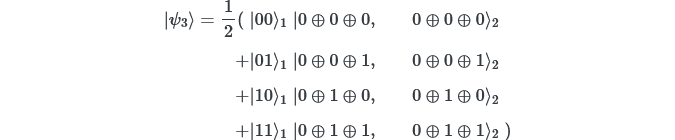

Thus:

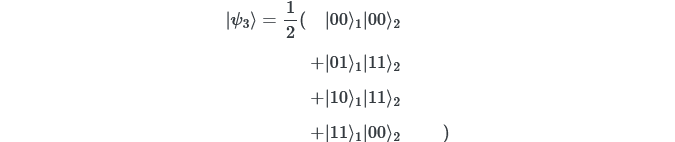

- We measure the second register. With $50\%$ probability we will see either $|00⟩_2$
or $|11⟩_2$
. For the sake of the example, let us assume that we see $|11⟩_2$
. The state of the system is then

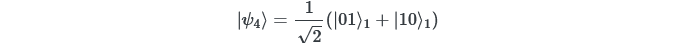

where we omitted the second register since it has been measured.

- Apply Hadamard on the first register

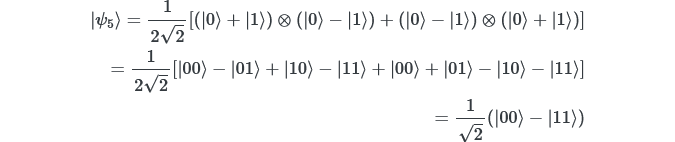

- Measuring the first register will give either $|00⟩$ or $|11⟩$ with equal probability.



- If we see $|11⟩$ then

Screenshot 2023-07-26 at 17-02-02 Simon&#39 s Algorithm.png

which tells us that $b \ne 01$ or $10$ , and the two remaining potential solutions are $b=00$ or $b=11$. Note that $b=00$ will always be a trivial solution to our simultaneous equations. If we repeat steps 1-6 many times, we would only measure $|00\rangle$ or $|11⟩$ as

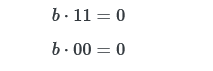

are the only equations that satisfy $b=11$. We can verify $b=11$ by picking a random input ($x_i$
) and checking $f(x_i) = f(x_i \oplus b)$
. For example:


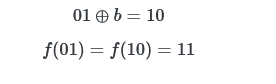

#Qiskit Implementation

We now implement Simon's algorithm for an example with 3-qubits and $b=110$.

In [17]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram


## Oracle

The Simon algorithm deals with finding a hidden bitstring $b \in \{0,1\}^n$
from an oracle $f_b$
that satisfies $f_b(x) = f_b(y)$
if and only if $y = x \oplus b$ for all $ x \in \{0,1\}^n$
. Here, the is the bitwise XOR operation. Thus, if $b=0.....0$, i.e., the all-zero bitstring, then $f_b$
is a 1-to-1 (or, permutation) function. Otherwise, if $b \ne 0...0$, then $f_b$
is a 2-to-1 function.

In the algorithm, the oracle receives $|x⟩|0⟩$ as input. With regards to a predetermined $b$, the oracle writes its output to the second register so that it transforms the input to $|x⟩|f_b(x)⟩$
such that $f(x) = f(x \oplus b) for all $ x \in \{0,1\}^n
.

Such a blackbox function can be realized by the following procedures.

- Copy the content of the first register to the second register.

Screenshot 2023-07-26 at 17-33-34 Simon&#39 s Algorithm.png


- (Creating 1-to-1 or 2-to-1 mapping) If $b$ is not all-zero, then there is the least index $j$ so that $b_j = 1$
. If $x_j = 0$
, then XOR the second register with $b$. Otherwise, do not change the second register.

Screenshot 2023-07-26 at 17-34-49 Simon&#39 s Algorithm.png

-  (Creating random permutation) Randomly permute and flip the qubits of the second register.

Screenshot 2023-07-26 at 17-35-06 Simon&#39 s Algorithm.png

In [24]:
def simon_oracle(b):
    """returns a Simon oracle for bitstring b"""
    b = b[::-1] # reverse b for easy iteration
    n = len(b)
    qc = QuantumCircuit(n*2)
    # Do copy; |x>|0> -> |x>|x>
    for q in range(n):
        qc.cx(q, q+n)
    if '1' not in b:
        return qc  # 1:1 mapping, so just exit
    i = b.find('1') # index of first non-zero bit in b
    # Do |x> -> |s.x> on condition that q_i is 1
    for q in range(n):
        if b[q] == '1':
            qc.cx(i, (q)+n)
    return qc

Here we implemented a general Simon oracle using Qiskit.

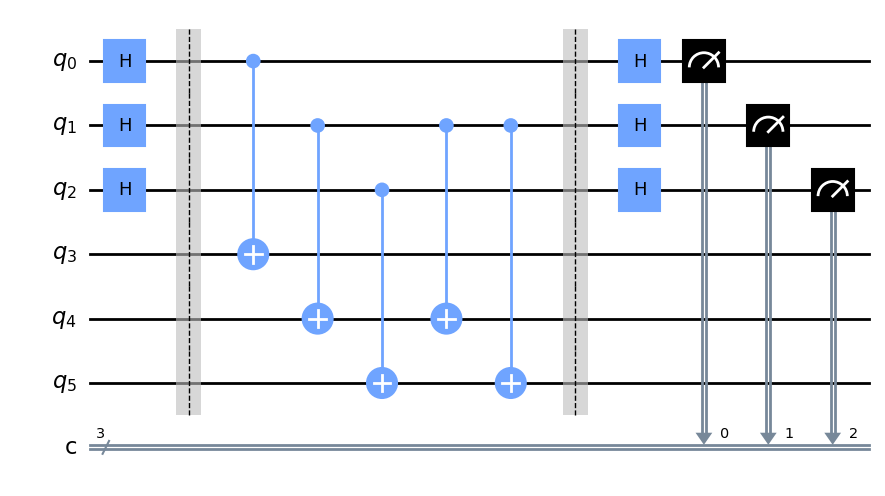

In [25]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))

# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

## Experiment with Simulators

We can run the above circuit on the simulator.

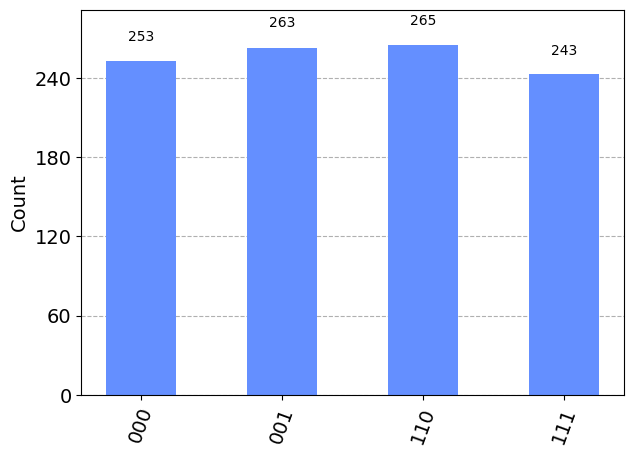

In [26]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

Since we know $b$ already, we can verify these results do satisfy $b . z = 0 (\text{ mod } 2)$ :

In [27]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
110.000 = 0 (mod 2)
110.110 = 0 (mod 2)


Using these results, we can recover the value of $b =110$ by solving this set of simultaneous equations. For example, say we first measured 001, this tells us:

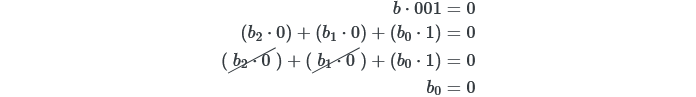

If we next measured 111, we have:

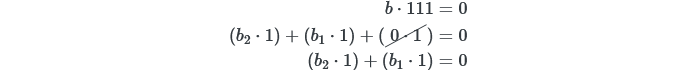

Which tells us either:

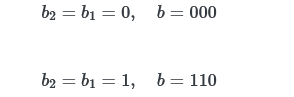

Of which $ b = 110$ is the non-trivial solution to our simultaneous equations. We can solve these problems in general using Gaussian elimination, which has a run time of $\mathcal{O}(n^3)$
.

### Experiment with Real Devices

The circuit in previous section  uses $2n = 6$ qubits, while at the time of writing many IBM Quantum free devices only have 5 qubits. We will run the same code, but instead using $b=11$ as in the example in previous section, requiring only 4 qubits.

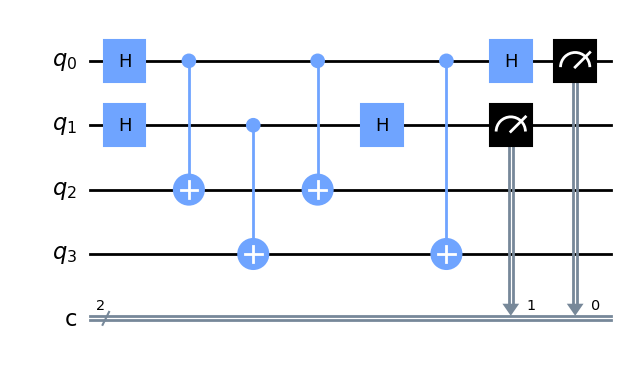

In [28]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 = simon_circuit_2.compose(simon_oracle(b))

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw('mpl')

This circuit is slightly different to the circuit shown in previous section. The outputs are different, but the input collisions are the same, i.e. both have the property that $f(x) = f(x \oplus 11)$.

In [29]:
from qiskit import IBMQ
IBMQ.save_account('c5a303670922a83ac5699dc2fea334193919a9e2fe6943debde1ac52815df5e39c6a137e05136088f3a7715e8d6dbd10097baf193df1fa22206a85931166946f')

In [30]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3)
job = backend.run(transpiled_simon_circuit)
job_monitor(job, interval=2)

least busy backend:  ibmq_belem
Job Status: job has successfully run


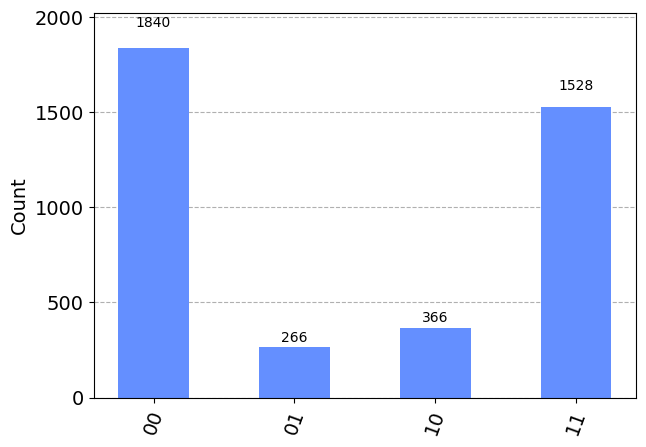

In [31]:
# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [32]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 11
11.00 = 0 (mod 2) (179.7%)
11.01 = 1 (mod 2) (26.0%)
11.10 = 1 (mod 2) (35.7%)
11.11 = 0 (mod 2) (149.2%)


As we can see, the most significant results are those for which $b.z$(mod 2). The other results are erroneous, but have a lower probability of occurring. Assuming we are unlikely to measure the erroneous results, we can then use a classical computer to recover the value of by solving the linear system of equations. For this $n=2$ case, $b=11$.